In [36]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
apps = pd.read_csv("C:/Users/Karishma Bhalshankar/Downloads/extracted4/googleplaystore.csv")

In [21]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [37]:
apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [42]:
selected_columns = [
    'App',
    'Category',
    'Reviews',
    'Rating',
    'Size',
    'Installs',
    'Type',
    'Price',
    'Content Rating',
    'Genres'
]
playstore = apps[selected_columns].copy()

In [43]:
playstore.isnull().values.any()
playstore.isnull().sum()

App                  0
Category             0
Reviews              0
Rating            1474
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [45]:
playstore['Rating'] = playstore['Rating'].fillna(playstore['Rating'].mean())
playstore.isnull().sum()

App               0
Category          0
Reviews           0
Rating            0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
dtype: int64

In [48]:
# List of characters to remove
chars_to_remove = [',', '+', '$']
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        playstore[col] = playstore[col].apply(lambda x: x.replace(char, ''))
        
# Print a summary of the apps dataframe
-print(playstore.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Reviews         10841 non-null  object 
 3   Rating          10841 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
dtypes: float64(1), object(9)
memory usage: 847.1+ KB
None


In [47]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [49]:
playstore.nlargest(10, 'Installs')

TypeError: Column 'Installs' has dtype object, cannot use method 'nlargest' with this dtype

In [50]:
playstore['Installs'] = pd.to_numeric(playstore['Installs'], errors='coerce')

playstore.sort_values('Installs', ascending=False)

,App,Category,Reviews,Rating,Size,Installs,Type,Price,Content Rating,Genres
3896,Subway Surfers,GAME,27711703,4.500000,76M,1.000000e+09,Free,0,Everyone 10+,Arcade
3943,Facebook,SOCIAL,78128208,4.100000,Varies with device,1.000000e+09,Free,0,Teen,Social
335,Messenger – Text and Video Chat for Free,COMMUNICATION,56642847,4.000000,Varies with device,1.000000e+09,Free,0,Everyone,Communication
3523,Google Drive,PRODUCTIVITY,2731211,4.400000,Varies with device,1.000000e+09,Free,0,Everyone,Productivity
3565,Google Drive,PRODUCTIVITY,2731211,4.400000,Varies with device,1.000000e+09,Free,0,Everyone,Productivity
...,...,...,...,...,...,...,...,...,...,...
7434,Pekalongan CJ,SOCIAL,0,4.193338,5.9M,0.000000e+00,Free,0,Teen,Social
5945,Ain Arabic Kids Alif Ba ta,FAMILY,0,4.193338,33M,0.000000e+00,Paid,2.99,Everyone,Education
5486,AP Series Solution Pro,FAMILY,0,4.193338,7.4M,0.000000e+00,Paid,1.99,Everyone,Education
6692,cronometra-br,PRODUCTIVITY,0,4.193338,5.4M,0.000000e+00,Paid,154.99,Everyone,Productivity


In [51]:
playstore.nlargest(10, 'Installs')

,App,Category,Reviews,Rating,Size,Installs,Type,Price,Content Rating,Genres
152,Google Play Books,BOOKS_AND_REFERENCE,1433233,3.9,Varies with device,1.000000e+09,Free,0,Teen,Books & Reference
335,Messenger – Text and Video Chat for Free,COMMUNICATION,56642847,4.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication
336,WhatsApp Messenger,COMMUNICATION,69119316,4.4,Varies with device,1.000000e+09,Free,0,Everyone,Communication
338,Google Chrome: Fast & Secure,COMMUNICATION,9642995,4.3,Varies with device,1.000000e+09,Free,0,Everyone,Communication
340,Gmail,COMMUNICATION,4604324,4.3,Varies with device,1.000000e+09,Free,0,Everyone,Communication
341,Hangouts,COMMUNICATION,3419249,4.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication
381,WhatsApp Messenger,COMMUNICATION,69119316,4.4,Varies with device,1.000000e+09,Free,0,Everyone,Communication
382,Messenger – Text and Video Chat for Free,COMMUNICATION,56646578,4.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication
386,Hangouts,COMMUNICATION,3419433,4.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication
391,Skype - free IM & video calls,COMMUNICATION,10484169,4.1,Varies with device,1.000000e+09,Free,0,Everyone,Communication


In [53]:
playstore['Size'] = playstore.Size.apply(lambda x: x.strip('+'))
playstore['Size'] = playstore.Size.apply(lambda x: x.replace(',', ''))
playstore['Size'] = playstore.Size.apply(lambda x: x.replace('M', 'e+6'))
playstore['Size'] = playstore.Size.apply(lambda x: x.replace('k', 'e+3'))
playstore['Size'] = playstore.Size.replace('Varies with device', np.NaN)

In [55]:
playstore['Size'] = pd.to_numeric(playstore['Size'])

playstore.head()

,App,Category,Reviews,Rating,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,4.1,19000000.0,10000.0,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,967,3.9,14000000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,4.7,8700000.0,5000000.0,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,4.5,25000000.0,50000000.0,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,4.3,2800000.0,100000.0,Free,0,Everyone,Art & Design;Creativity


In [57]:
playstore.Price = pd.to_numeric(playstore.Price)

ValueError: Unable to parse string "Everyone" at position 10472

In [58]:
playstore['Price'] = playstore.Price.replace('Everyone', np.NaN)
playstore.Price = pd.to_numeric(playstore.Price)

In [59]:
playstore

,App,Category,Reviews,Rating,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,4.100000,19000000.0,10000.0,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,967,3.900000,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,4.700000,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,4.500000,25000000.0,50000000.0,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,4.300000,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,38,4.500000,53000000.0,5000.0,Free,0.0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,4,5.000000,3600000.0,100.0,Free,0.0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,3,4.193338,9500000.0,1000.0,Free,0.0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,4.500000,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference


In [65]:
# Exploring app categories
!pip install plotly
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

num_categories = len(playstore['Category'].unique())
print('Number of categories = ', num_categories)

num_apps_in_category = apps['Category'].value_counts()

sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, 
        y = num_apps_in_category.values,
)]

plotly.offline.iplot(data)

Number of categories =  34


In [66]:
#Distribution of app rating
# Average rating of apps
avg_app_rating = playstore['Rating'].mean()
print('Average_rating_app = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = playstore['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

Average_rating_app =  4.1933383153622925


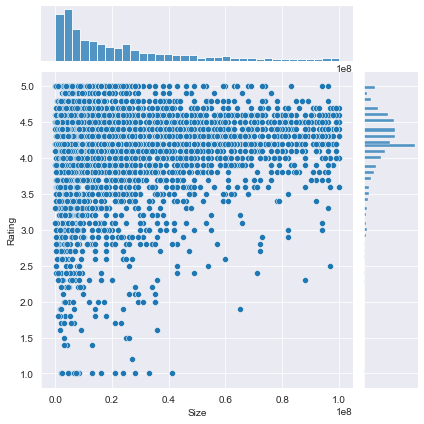

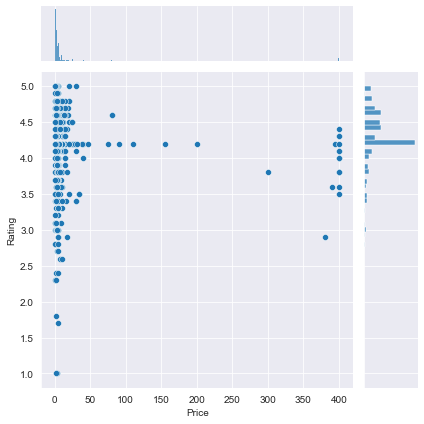

In [78]:
#Size and price of an app

%matplotlib inline
sb.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

size_and_rating_present = playstore[(~playstore['Rating'].isnull()) & (~playstore['Size'].isnull())]
large = size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)

plt1 = sb.jointplot(x = large['Size'], y = large['Rating'])


paid_playstore = size_and_rating_present[size_and_rating_present['Type'] == 'Paid']


plt2 = sb.jointplot(x = paid_playstore['Price'], y = paid_playstore['Rating'])






,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


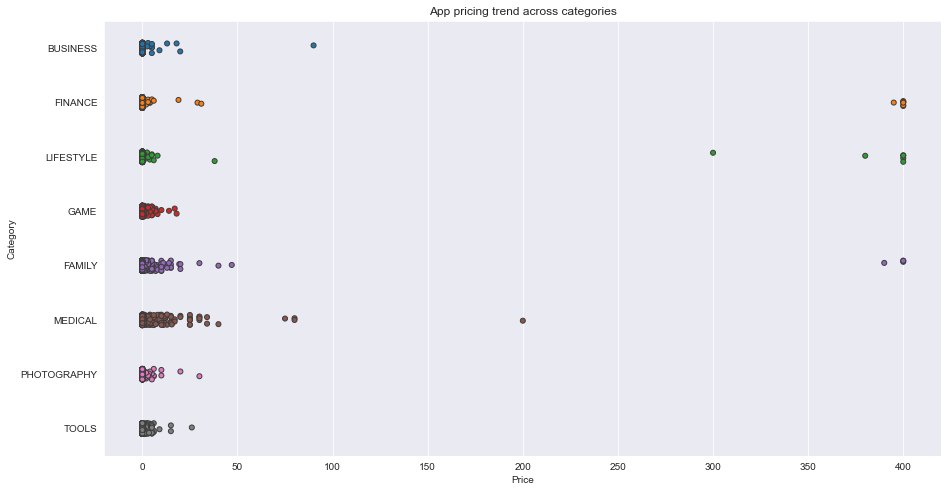

In [80]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)


popular_cats = playstore[playstore.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                                 'MEDICAL', 'TOOLS', 'FINANCE',
                                                 'LIFESTYLE','BUSINESS'])]


ax = sb.stripplot(x = popular_cats['Price'], y = popular_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')


apps_above_200 = popular_cats[popular_cats['Price'] > 200 ]
apps_above_200[['Category', 'App', 'Price']]

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

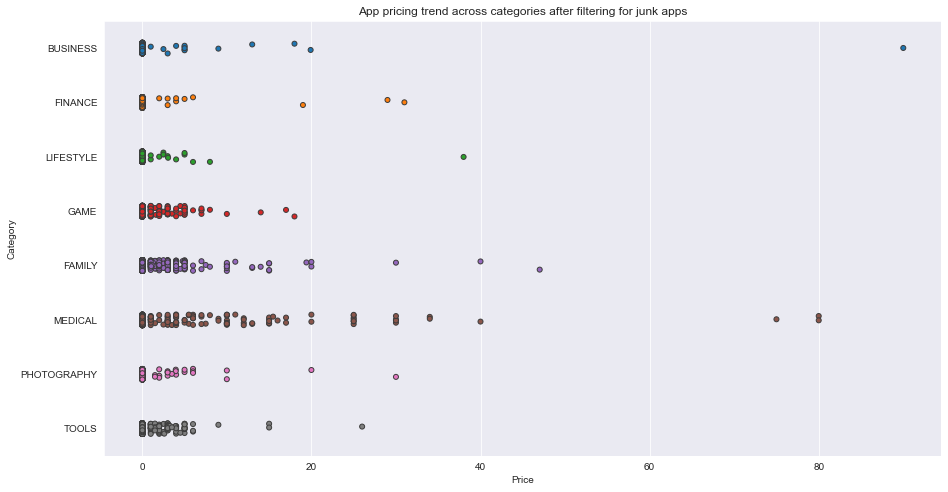

In [81]:

apps_under_100 = popular_cats[popular_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sb.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [82]:
#Popularity of paid apps vs free apps

trace0 = go.Box(
    # Data for paid apps
    y = playstore[playstore['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = playstore[playstore['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

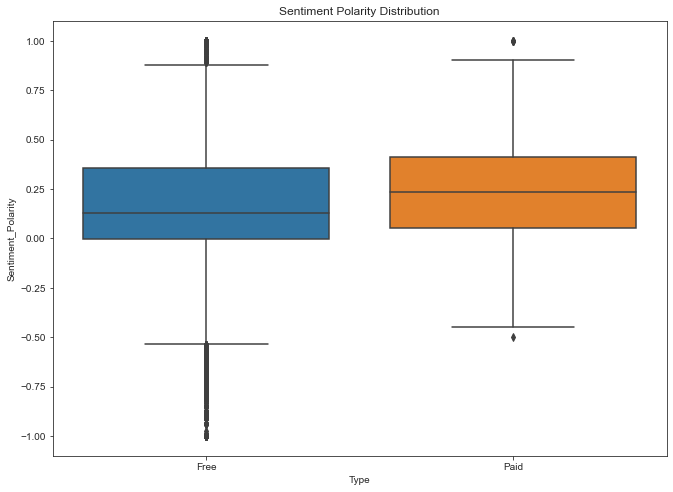

In [89]:
# Load user_reviews.csv
reviews_df = pd.read_csv("C:/Users/Karishma Bhalshankar/Downloads/extracted4/googleplaystore_user_reviews.csv")

# Join the two dataframes
merged_df = pd.merge(playstore, reviews_df, on = "App")

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Translated_Review'])

sb.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sb.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

In [86]:
a = pd.read_csv("C:/Users/Karishma Bhalshankar/Downloads/extracted4/googleplaystore_user_reviews.csv")

In [87]:
a.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
